# **Image Processing** **-**  *****American Sign Language (ASL)*****

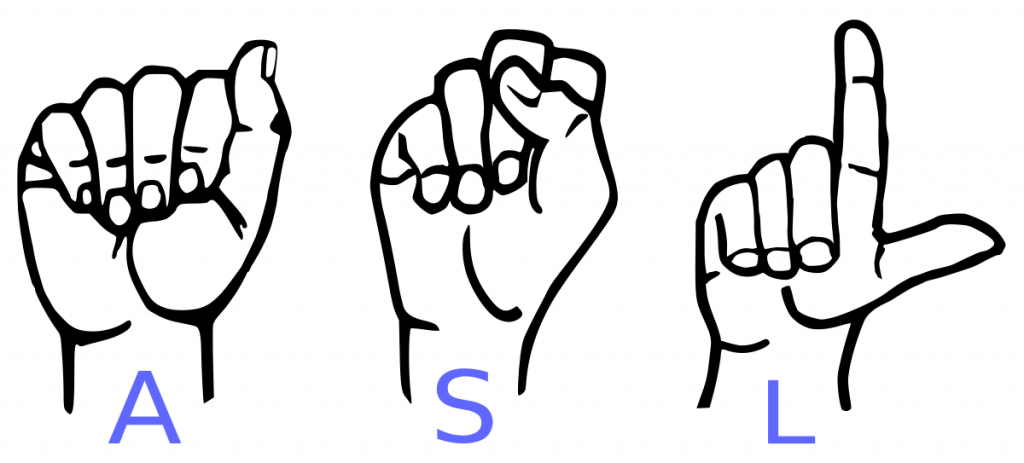






```

```

## **Group Members :**
---
| **Name**        |    **Roll No**   | 
| :---            |    :----:        |
| R.Abhinav       | CB.EN.U4CSE19453 |
| P.Kalaiarasan   | CB.EN.U4CSE19446 |
| P.Koushik       | CB.EN.U4CSE19449 |
| S.Shanthan      | CB.EN.U4CSE19459 |

---

# **Review-1**

## **Mounting and Importing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**All the import statements for the libraries used in the project below lies here.**



In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

## **Exploring the Data**

In [ ]:
#reading the dataset 

test_df = pd.read_csv("/content/drive/MyDrive/Sign Language/datasets/sign_mnist_test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/Sign Language/datasets/sign_mnist_train.csv")


In [ ]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,182,182,181,181,182,181,181,181,181,179,178,178,176,177,178,159,47,30,39,180,182,183,183,183,183,185,184,185,183,184,...,97,97,95,90,92,101,125,160,191,202,213,215,96,88,109,216,208,207,203,178,151,112,87,80,76,80,86,97,102,103,108,132,170,194,214,203,197,205,209,215


In [ ]:
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,175,176,175,174,174,173,173,174,170,172,172,170,171,171,170,168,168,167,166,176,176,176,176,176,176,177,177,176,178,178,...,198,200,199,199,197,197,197,196,194,193,192,191,199,201,190,190,194,192,187,181,154,72,66,74,54,139,210,198,201,201,201,200,197,198,198,197,195,195,193,192


In [ ]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


In [ ]:
# Showing the first 4 lines of the training set

train_df.iloc[:4,:10]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9
0,3,107,118,127,134,139,143,146,150,153
1,6,155,157,156,156,156,157,156,158,158
2,2,187,188,188,187,187,186,187,188,187
3,2,211,211,212,212,211,210,211,210,210


In [ ]:
print(f'Number of images in the training set: {train_df.shape[0]}')
print(f'Number of images in the test set: {test_df.shape[0]}')

d = int((train_df.shape[1] - 1)**0.5)
print(f'Shape of the images: {d} x {d}')

Number of images in the training set: 27455
Number of images in the test set: 7172
Shape of the images: 28 x 28


In [ ]:
print(train_df.dtypes)
print("_______________\n")
print(train_df.dtypes.value_counts())

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object
_______________

int64    785
dtype: int64


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## **Statistical Analysis of data** 

In [ ]:
train_df.mean()

label        12.318813
pixel1      145.419377
pixel2      148.500273
pixel3      151.247714
pixel4      153.546531
               ...    
pixel780    162.736696
pixel781    162.906137
pixel782    161.966454
pixel783    161.137898
pixel784    159.824731
Length: 785, dtype: float64

In [ ]:
#finding the median for the numberical columns in the data set 
train_df.median()

label        13.0
pixel1      150.0
pixel2      153.0
pixel3      156.0
pixel4      158.0
            ...  
pixel780    184.0
pixel781    184.0
pixel782    182.0
pixel783    182.0
pixel784    182.0
Length: 785, dtype: float64

In [ ]:
# finding the mode of the numerical columns in the data set

k = train_df.mode()

k[0:1]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,17.0,158.0,171.0,172.0,171.0,165.0,159.0,157.0,158.0,174.0,164.0,165.0,165.0,166.0,164.0,164.0,164.0,165.0,165.0,164.0,167.0,166.0,159.0,158.0,167.0,167.0,167.0,167.0,165.0,172.0,173.0,160.0,176.0,180.0,179.0,179.0,179.0,166.0,171.0,165.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [ ]:
# finding the standard deviation the dataset for the numerical values 
standard_deviation = train_df.std()
print(standard_deviation)

label        7.287552
pixel1      41.358555
pixel2      39.942152
pixel3      39.056286
pixel4      38.595247
              ...    
pixel780    63.444008
pixel781    63.509210
pixel782    63.298721
pixel783    63.610415
pixel784    64.396846
Length: 785, dtype: float64


In [ ]:
# finding the variance for the numerical values of the dataset
variance = standard_deviation**2
print(variance)

label         53.108415
pixel1      1710.530097
pixel2      1595.375528
pixel3      1525.393469
pixel4      1489.593076
               ...     
pixel780    4025.142186
pixel781    4033.419724
pixel782    4006.728058
pixel783    4046.284910
pixel784    4146.953763
Length: 785, dtype: float64


## **Data preprocessing**
* converting array to images(tensors)

* visulaizing lables and making sure that dataset is balanced

* performing encoding for lables

In [ ]:
# couting the missing values or cells with empty values 

no_of_missing_values = train_df.isnull().sum()
total_missing_values = no_of_missing_values.sum()
print(no_of_missing_values)

print("\n\nTotal missing values in the dataset: {0}".format(total_missing_values))

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


Total missing values in the dataset: 0


In [ ]:
# checking if there are any duplicated values 

print("Duplicated Columns :",train_df.duplicated().sum())

Duplicated Columns : 0


In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [ ]:
# Create training and testing arrays
train_set = np.array(train_df, dtype = 'float32')
test_set = np.array(test_df, dtype='float32')

**Reason:**
- The training and testing input arrays are converted to continuous float values since it allows our model for a more precise learning as compared to discrete values

In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Text(0.5, 1.0, 'T')

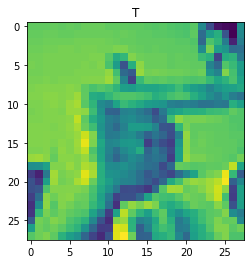

In [ ]:
#See a random image for class label verification
import random
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train_df["label"][i]
plt.title(f"{class_names[label_index]}")

**Inference:**
- We also need to reshape the array to (28x28) since the initial shape is just a row array.

## **Subplots :** 

- `Define the dimensions of the plot grid`
- `flaten the 15 x 15 matrix into 225 array`
- `get the length of the train dataset`
- `Select a random number from 0 to n_train`
- `create evenly spaces variables`
- `Select a random number`
- `read and display an image with the selected index`

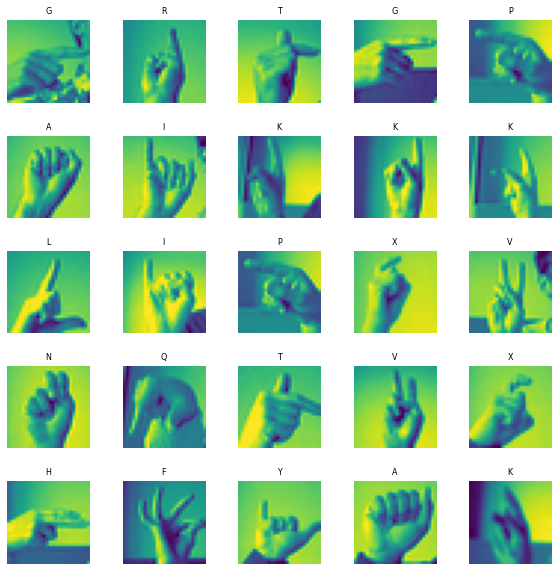

In [ ]:
#  
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()  
n_train = len(train_set)
for i in np.arange(0, W_grid * L_grid): 
    index = np.random.randint(0, n_train)     
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
train_x = train_df[train_df.columns[1::]].to_numpy()           
train_y = train_df[train_df.columns[0]].to_numpy()

test_x = test_df[test_df.columns[1::]].to_numpy() 
test_y = test_df[test_df.columns[0]].to_numpy()               

print("SUMMARY OF DATA:")

print("train_x shape: " + str(train_x.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x.shape))
print("test_y shape: " + str(test_y.shape))

SUMMARY OF DATA:
train_x shape: (27455, 784)
train_y shape: (27455,)
test_x shape: (7172, 784)
test_y shape: (7172,)


- we know that the pixel values lies between 0-255 but it is observed that models performs exceptionally well if we scale pixel values between 0-1

## **Visualization**

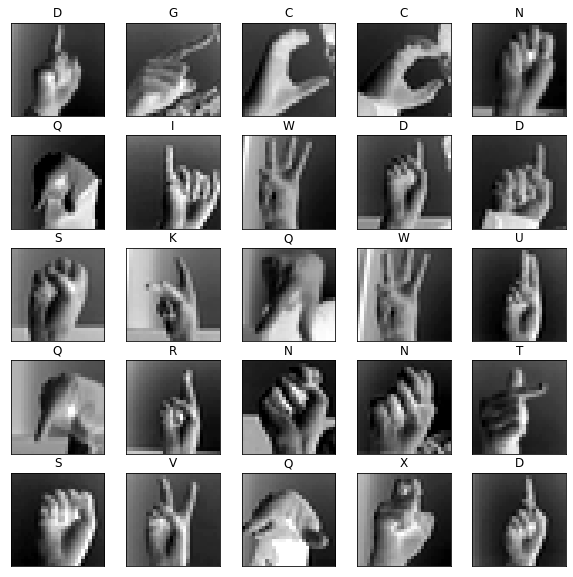

In [ ]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(train_y[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
#Get our training labels:
labels = train_df['label'].values

In [ ]:
label_frq=pd.value_counts(train_df['label'],ascending=True).reset_index(level=0)
pd.DataFrame(label_frq)

,index,label
0,4,957
1,1,1010
2,7,1013
3,12,1055
4,21,1082
5,15,1088
6,6,1090
7,10,1114
8,24,1118
9,0,1126


In [ ]:
unique_labels = train_df['label'].unique()
unique_labels = np.sort(unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

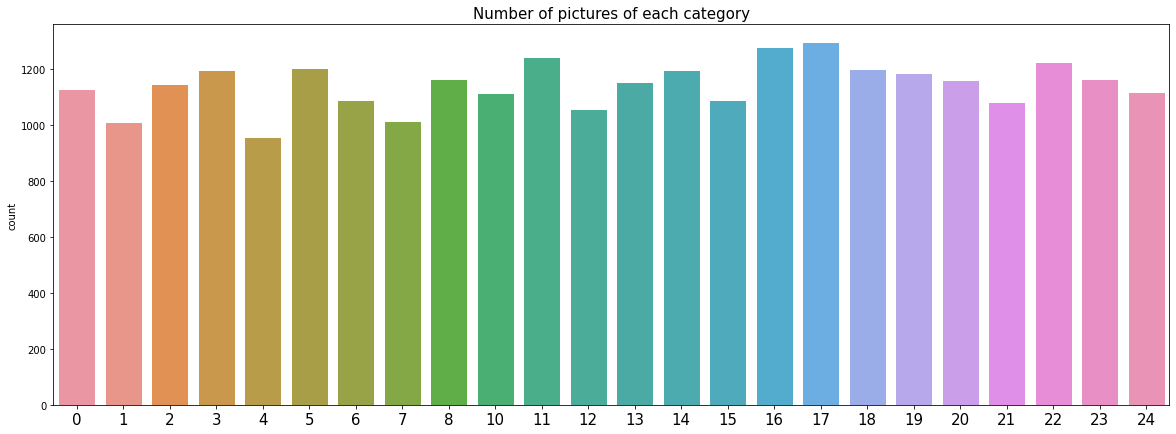

In [ ]:
# visulaizing the data

plt.figure(figsize=(20,7))
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(fontsize = 15)
sns.set_style("darkgrid");
sns.countplot(train_y);

**Observation:**
- We can see the visual tells us that there are nearly 1000 examples for each class output 
- So we can consider this dataset as a balanecd dataset because there's no class suffering from very less or too much examples


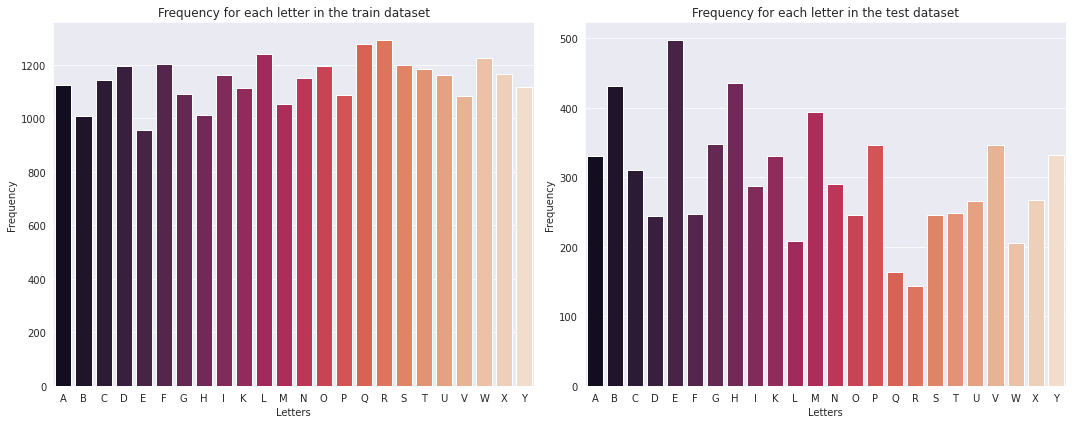

In [ ]:
list_data = [train_df, test_df]
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for data, ax, names in zip(list_data, axes.ravel(), ['train', 'test']):
    sns.countplot(data['label'], palette='rocket', ax=ax)
    ax.set_title("Frequency for each letter in the {} dataset".format(names))
    ax.set_xlabel('Letters')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                            'T','U','V','W','X','Y'])

plt.tight_layout()

In [ ]:
#Encoding:

from sklearn.preprocessing import LabelBinarizer
labels = train_df['label'].values
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

**Observation:**
- So basically LabelBinarizer performed `One-Hot Encoding`  on our training data.


In [ ]:
labels[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
import cv2
df_htrain = pd.read_csv("/content/drive/MyDrive/Sign Language/Hog_Features.csv")
df_htest = pd.read_csv("/content/drive/MyDrive/Sign Language/Hog_Features_test.csv")
htrain = df_htrain[df_htrain.columns[1::]].to_numpy()
htest = df_htest[df_htest.columns[1::]].to_numpy()
print("Training Data size : ",htrain.shape)
print("Test Data size : ",htest.shape)

Training Data size :  (27455, 1764)
Test Data size :  (7172, 1764)


# **Review-2(Final Review)**

##**Feature Engineering**

In [ ]:
train_df_original = train_df.copy()

In [ ]:
train_x = train_x/255
test_x = test_x/255

In [ ]:
# Split into training, test and validation sets
val_index = int(train_df.shape[0]*0.1)

train_df = train_df_original.iloc[val_index:]
val_df = train_df_original.iloc[:val_index]

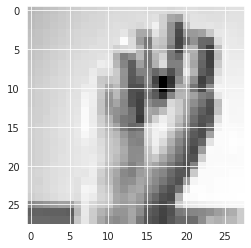

In [ ]:
index = 4
plt.imshow(train_x[index].reshape(28, 28),cmap='gray')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
from sklearn import svm
%matplotlib inline
np.random.seed(1)

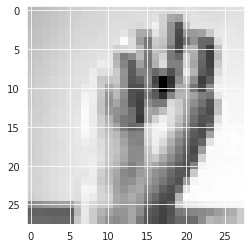

In [ ]:
image = plt.imshow(train_x[index].reshape(28, 28),cmap='gray')

###*****End of the Review🙂*****

In this work, we propose a method to detect American Sign Language by analyzing sign language MNIST image dataset. We will use the pixel level features in each image as well as HOG Features, to be followed with feature selection to improve the performance. Finally we will print different evaluation metrics for the classifier model such as Accuracy, F1 Score, Precision, Recall and plot ROC curves for all the classes.

## **Feature Extraction Using HOG Features**

In [ ]:
from skimage.feature import hog
from skimage import data,exposure
def get_hog(image):
    fd,hog_image=hog(image.reshape(28,28),pixels_per_cell=(2,2),
                        cells_per_block=(1, 1),visualize=True,feature_vector=False)
    return(fd,hog_image)

def show_hog(image,hog_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    ax1.set_title('Input image')
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

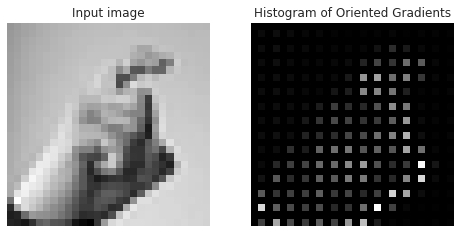

(1, 1764)


In [ ]:
a,b=get_hog(train_x[180])
show_hog(train_x[180],b)
a=a.reshape(-1)
a=a.reshape(1,len(a))
print(a.shape)

## **Feature Selection using PCA**

In [ ]:
model = []                                                                      # Model names
accuracy = []                                                                   # Accuracy of the respective model

In [ ]:
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
pca = PCA(n_components=30)
htrain_pca = pca.fit_transform(htrain)

htest_pca=pca.transform(htest)

clf = svm.SVC(kernel='rbf') # rbf Kernel                                        #Train the model using the training sets
clf.fit(htrain_pca,train_y)
y_pred = clf.predict(htest_pca)                                                 #Predict the response for test dataset
x = metrics.accuracy_score(test_y, y_pred)
model.append('SVM')
accuracy.append(x*100)
print(classification_report(test_y, y_pred))
print("SVM's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.95      0.97       432
           2       1.00      0.94      0.97       310
           3       0.98      0.93      0.95       245
           4       0.99      1.00      0.99       498
           5       0.96      1.00      0.98       247
           6       0.98      0.92      0.95       348
           7       0.98      0.98      0.98       436
           8       0.89      0.99      0.94       288
          10       0.99      0.87      0.93       331
          11       1.00      1.00      1.00       209
          12       0.89      0.84      0.87       394
          13       0.79      0.88      0.84       291
          14       0.92      0.91      0.92       246
          15       1.00      1.00      1.00       347
          16       0.89      1.00      0.94       164
          17       0.55      0.99      0.70       144
          18       0.93    

In [ ]:
y_pred = clf.predict(htrain_pca)
print("Training Set Metrics : ")
print("Accuracy:",metrics.accuracy_score(train_y, y_pred))
print("F1 Score:",metrics.f1_score(train_y, y_pred, average='weighted'))
print("Precision: ",metrics.precision_score(train_y,y_pred, average='weighted'))
print("Recall: ",metrics.recall_score(train_y,y_pred,average = 'weighted'))

Training Set Metrics : 
Accuracy: 0.9999635767619741
F1 Score: 0.9999635761187055
Precision:  0.9999636101471603
Recall:  0.9999635767619741


In [ ]:
x=[]
y=[]
y2=[]
for i in range(1,10):
    clf = svm.SVC(kernel='rbf',C=i)
    clf.fit(htrain_pca,train_y)
    y_pred = clf.predict(htest_pca)
    x.append(i)
    y.append(metrics.f1_score(test_y, y_pred, average='weighted'))
    y2_pred = clf.predict(htrain_pca)
    y2.append(metrics.f1_score(train_y, y2_pred, average='weighted'))

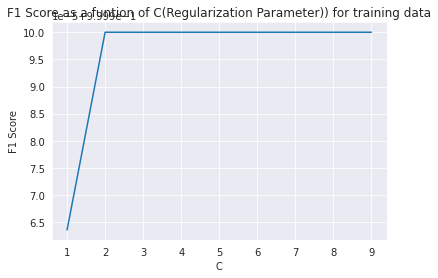

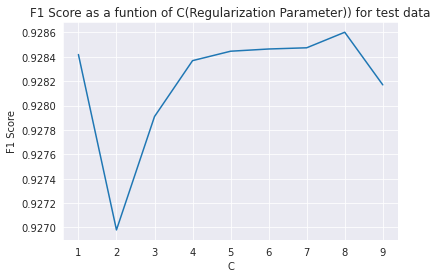

In [ ]:
plt.plot(x,y2)
plt.title("F1 Score as a funtion of C(Regularization Parameter)) for training data")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.show()

plt.plot(x,y)
plt.title("F1 Score as a funtion of C(Regularization Parameter)) for test data")
plt.xlabel("C")
plt.ylabel("F1 Score")
plt.show()

### **Testing The Model**
* For testing we are going to use the test data only

In [ ]:
print('True:', test_y[25])
print('Pred:', y_pred[25])

True: 15
Pred: 15


## **Perceptron:**

In [ ]:
tran_y=pd.DataFrame(train_y)


In [ ]:
tran_y.tail()

,0
27450,13
27451,23
27452,18
27453,17
27454,23


In [ ]:
tes_y=pd.DataFrame(test_y)

In [ ]:
tes_x=pd.DataFrame(test_x)

In [ ]:
tran_x=pd.DataFrame(train_x)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier()#solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1
clf.fit(tran_x, tran_y)
y_pred=clf.predict(tes_x)
x = metrics.accuracy_score(tes_y, y_pred)
accuracy.append(x*100)
model.append('Perceptron')
print(classification_report(tes_y, y_pred))
print("Perceptron's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       0.99      0.91      0.94       432
           2       0.90      0.91      0.91       310
           3       0.84      0.82      0.83       245
           4       0.94      0.91      0.93       498
           5       0.64      0.91      0.75       247
           6       0.85      0.81      0.83       348
           7       0.87      0.72      0.79       436
           8       0.78      0.75      0.76       288
          10       0.70      0.49      0.58       331
          11       0.73      0.77      0.75       209
          12       0.76      0.79      0.78       394
          13       0.84      0.57      0.68       291
          14       0.95      0.63      0.76       246
          15       1.00      0.97      0.98       347
          16       0.58      0.78      0.67       164
          17       0.24      0.43      0.31       144
          18       0.43    

## **Logistic Regression:**
 Multi class Logistic Regression Using OVR
* Since we are going to use One Vs Rest algorithm, set > multi_class='ovr'
* Note: since we are using One Vs Rest algorithm we must use 'liblinear' solver with it.

In [ ]:
from sklearn.linear_model import LogisticRegression                             # train a logistic regression model on the training set
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report

LogReg = LogisticRegression(multi_class='ovr',solver='liblinear')               # instantiate model
LogReg.fit(htrain,train_y)                                                      # fit model
predicted_values = LogReg.predict(htest)                                        # make class predictions for the testing set
x = metrics.accuracy_score(test_y, predicted_values)
model.append('Logistic Regression')
accuracy.append(x*100)
print(classification_report(test_y, predicted_values))
print("Logistic Regression's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       0.97      0.90      0.93       432
           2       0.95      0.93      0.94       310
           3       0.81      0.99      0.89       245
           4       0.95      1.00      0.97       498
           5       0.95      0.97      0.96       247
           6       0.82      0.85      0.83       348
           7       0.96      0.94      0.95       436
           8       0.90      0.87      0.88       288
          10       0.91      0.74      0.81       331
          11       0.92      1.00      0.96       209
          12       0.79      0.62      0.70       394
          13       0.75      0.65      0.70       291
          14       0.78      0.79      0.78       246
          15       0.97      1.00      0.99       347
          16       0.76      0.87      0.81       164
          17       0.37      0.64      0.47       144
          18       0.70    

## **Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(train_x,train_y)
predicted_values = RF.predict(test_x)
x = metrics.accuracy_score(test_y, predicted_values)
accuracy.append(x*100)
model.append('Random Forest')
print(classification_report(test_y,predicted_values))
print("RF's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       331
           1       0.96      0.94      0.95       432
           2       0.94      0.98      0.96       310
           3       0.81      0.97      0.88       245
           4       0.89      0.97      0.93       498
           5       0.91      0.93      0.92       247
           6       0.92      0.86      0.89       348
           7       0.99      0.92      0.95       436
           8       0.81      0.70      0.75       288
          10       0.72      0.62      0.67       331
          11       0.81      1.00      0.90       209
          12       0.85      0.67      0.75       394
          13       0.73      0.58      0.65       291
          14       0.97      0.87      0.92       246
          15       0.95      1.00      0.97       347
          16       0.91      1.00      0.95       164
          17       0.29      0.56      0.38       144
          18       0.60    

## **KNN**

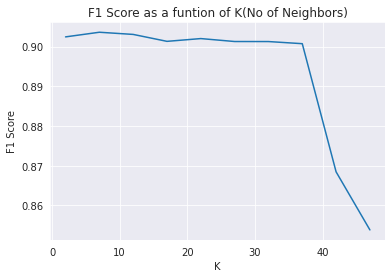

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x=[]
y=[]
for i in range(2,50,5):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(htrain_pca,train_y)
    y_pred = neigh.predict(htest_pca)
    x.append(i)
    y.append(metrics.f1_score(test_y, y_pred, average='weighted'))
plt.plot(x,y)
plt.title("F1 Score as a funtion of K(No of Neighbors)")
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.show()

In [ ]:
m=max(y)
index = y.index(m)
print("Max value of F1 Score occurs at K = ",x[index])
print("The Evaluation metrics are : ")
neigh = KNeighborsClassifier(n_neighbors=x[index])
neigh.fit(htrain_pca,train_y)
y_pred = neigh.predict(htest_pca)
x = metrics.accuracy_score(test_y, y_pred)
accuracy.append(x*100)
model.append('KNN')
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("F1 Score:",metrics.f1_score(test_y, y_pred, average='weighted'))
print("Precision: ",metrics.precision_score(test_y,y_pred, average='weighted'))
print("Recall: ",metrics.recall_score(test_y,y_pred,average = 'weighted'))

Max value of F1 Score occurs at K =  7
The Evaluation metrics are : 
Accuracy: 0.9033742331288344
F1 Score: 0.9036218462600369
Precision:  0.9104427818377326
Recall:  0.9033742331288344


## **Model Comparison**

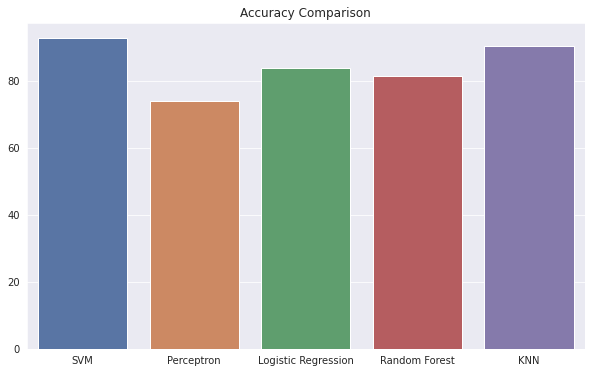

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison')
sns.barplot(x=model, y=accuracy, palette='deep')

In [ ]:
for x in range(len(accuracy)):
    print(accuracy[x])

92.63803680981594
73.96820970440602
83.63078639152258
81.39988845510318
90.33742331288343


In [ ]:
def Average(accuracy):
    return sum(accuracy) / len(accuracy)
average = Average(accuracy) 
print("Average accuracy of classifier models is =", round(average, 2))

Average accuracy of classifier models is = 84.39


## **To visualize the inner working of the model we use Confusion Matrix**

In [ ]:
y_predicted = neigh.predict(htest_pca)

In [ ]:
print('True:', test_y[0:25])                                                    # print the first 25 true and predicted responses
print('Pred:', y_predicted[0:25])

True: [ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7  2  0 21  4
 10]
Pred: [ 6  5 10  0  3 20 10 14  3  7  8  8 22 12  7  4 22  0  7  7  2  0 21  4
 10]


In [ ]:
from sklearn.metrics import confusion_matrix                                    # import confusion matrix class
cm = confusion_matrix(test_y,y_predicted)                                       # create classifier of confussion_matrix
cm                                                                              # it is two dimentional arraym

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 418,   0,   0,   0,   0,   0,   0,   0,  14,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 288,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 245,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 498,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 235,   0,   0,  12,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 323,   4,   0,   0,   0,   0,   0,
          0,   0,   2,   0,   0,  19,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   9

Text(159.0, 0.5, 'Truth')

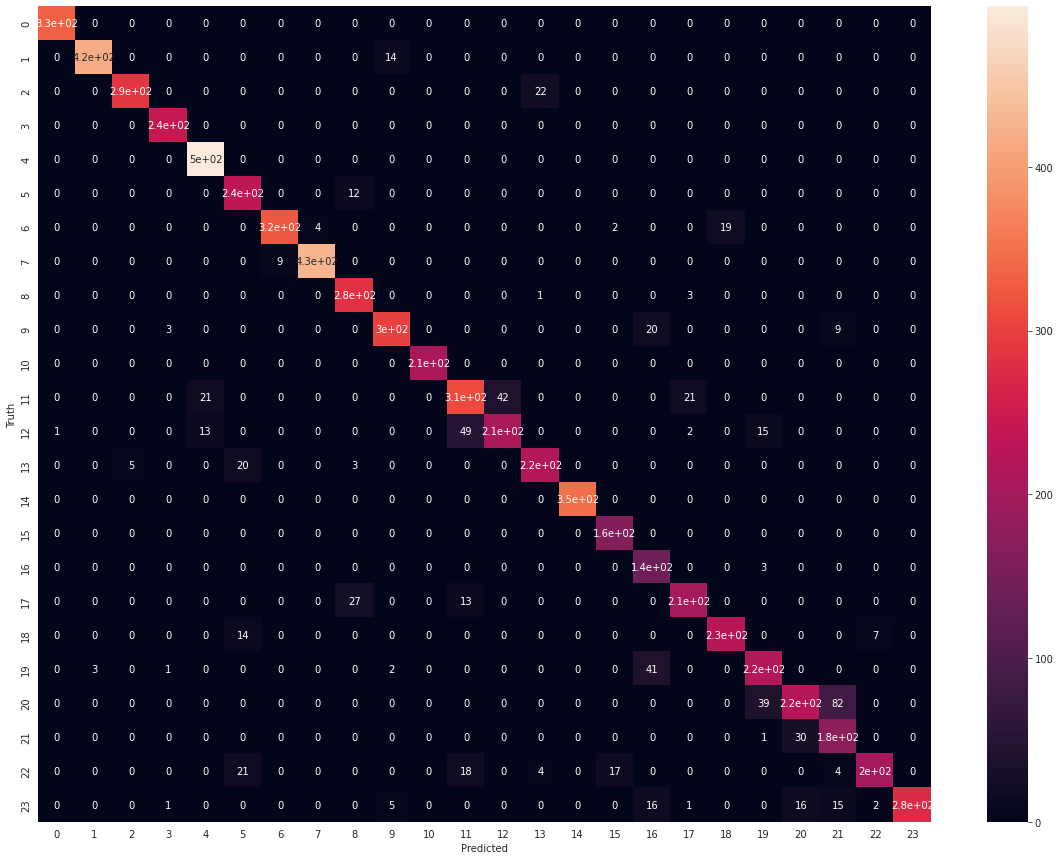

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Observation:**
- In above matrix, X axis contains `predicted values`, and Y axis contains `actual values`. 
- Each value of matrix show the number of times predicted value matched with actual value.

## **Cross Validation:**

In [ ]:
X_train = train_df[train_df.columns[1::]]    
y_train = train_df[train_df.columns[0]]

X_test = test_df[test_df.columns[1::]] 
y_test = test_df[test_df.columns[0]]              


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=2).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Got a mean of 0.98 with std=0.2

.

## **CONCLUSIONS AND FUTURE WORK**
Hand gesture recognition is a difficult problem and the current
work is only half way towards achieving the results needed
in the field.

-  This notebook presented a comparative study of five
algorithms applied to two different datasets for static gesture
recognition and classification, for human computer interaction.
-  Future work will be concerned with the study of different hand
feature selection applied to hand gesture recognition, noise
reduction in the depth images acquired.


## **References:**
1. https://en.wikipedia.org/wiki/Support-vector_machine

2. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
3. https://link.springer.com/article/10.1007/s10586-021-03282-8